# Oscilações

### Aplicações

- Frequências naturais de oscilação nas obras de engenharia civil;
- Instrumentos: Violão, Violino, etc.
- Alguns objetos: Relógio, Bungee Jump, Celulares
- Fenômenos naturais: Terremotos
- Biologia e Humano:
  - Coração Humano
  - Oscilação da liberação de insulina
- Elétrica:
  - Oscilador de Armstrong;
  - Circuito RLC;
- Asterosismologia:
  - Oscilação de uma Estrela de Nêutron

### Aplicações Oscilações com Amortecimento

- Subcrítico:
  - Portas de prédios públicos e hospitais
  - Circuito RLC
- Crítico:
  - Balança e instrumentos de precisão
  - Amortecedores de Veículos
  - Circuito RLC;
- Supercrítico:
  - Circuito RLC;
  - ...


## Movimento Harmônico Simples - Parte 1 - Revisão

In [1]:
import sympy as sp
%matplotlib inline
sp.init_printing()

### Lei de Hooke

In [2]:
x, k, Fel= sp.symbols('x k Fel')

In [3]:
el_force = sp.Eq(Fel, -k * x)

el_force

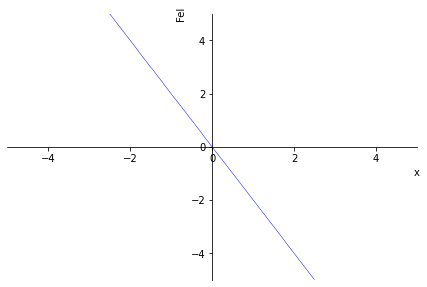

In [4]:
# Dando um valor simbólico para K de 2 N/m e Plotando o gráfico da Força Elástica

p1 = sp.plot_implicit(el_force.subs(k,2))

p1

##### Podemos verificar que a força depende da posição x...

### Energia Potencial Elástica

In [5]:
x, k, Uel, Ec, Emec= sp.symbols('x k Uel Ec Emec')

In [6]:
el_pot = sp.Eq(Uel, (k*x**2)/2)
el_pot

##### Assim como a Fel, a Uel depende da posição x...

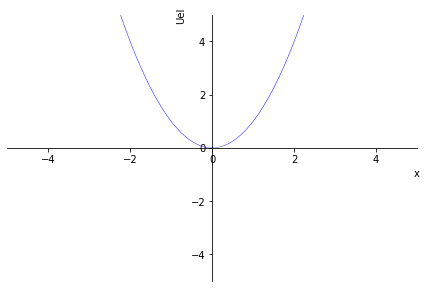

In [7]:
# Novamente irei assumir um valor 2 N/m para K e Plotando o gráfico da Força Elástica
el_pot = el_pot.subs(k,2)
p2 = sp.plot_implicit(el_pot)

In [8]:
kin_energy = sp.Eq(Ec, Emec - (k*x**2)/2)
kin_energy

##### Também veremos que a Ec dependerá da posição x

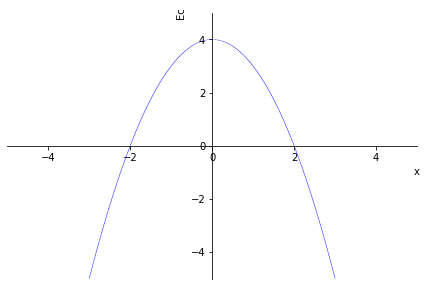

In [9]:
# Irei assumir uma Emec = 4 e k = 2 N/m, para fins de gráfico
kin_energy = kin_energy.subs(Emec,4).subs(k, 2)
p3 = sp.plot_implicit(kin_energy)

##### Combinando a Uel e a Ec no mesmo gráfico...

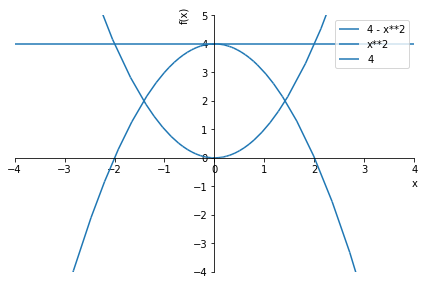

In [10]:
kin = Emec - (k*x**2)/2
pot = (k*x**2)/2
mec = 4

p4 = sp.plot(kin.subs(Emec,4).subs(k, 2), pot.subs(k, 2), mec, xlim=[-4,4], ylim=[-4,5], legend=True)


### Pesquisa 1

- a) Essa força determina a deformação de um corpo quando ele se estica ou se comprime. Isso dependerá da direção da força aplicada. É determinada pela natureza do material utilizado, e ainda, por suas dimensões;

- b) k possui unidade: Newton por Metro (N/m);

- c) 1600 N/m;

- d) 40 KN/m;

In [11]:
# Elevador de 5160 Newton e deslocamento de 2 metros

In [12]:
x, k, F= sp.symbols('x k F')

k_cte = sp.Eq(k, F/x)
k_cte

In [13]:
print(sp.solve(k_cte.subs(x, 2).subs(F, 5160), k)[0], 'N/m')

2580 N/m


#### e) 2580 N/m;

## Movimento Harmônico Simples - Parte 2

In [14]:
x, k, F, Fel, m, a, t, d, omega= sp.symbols('x k F Fel m a t d omega')

In [15]:
# Pela 2° Lei de Newton
sp.Eq(F, m * a)

In [16]:
# Igualando as forças do sistema e substituindo por derivadas para chegar em x
el_exp = -k*x 

sp.Eq(el_exp, m*a)

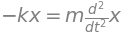

In [17]:
diff_exp = m*sp.Derivative(sp.Derivative(x, t), t)

sp.Eq(el_exp, diff_exp)

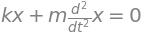

In [18]:
ode = sp.Eq(diff_exp -el_exp, 0)
ode

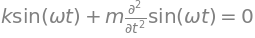

In [19]:
# Chutando funções

# x(t) = sen(wt)
func_rep = sp.sin(omega*t)

ode.subs(x, func_rep)

In [20]:
sp.Eq(x, func_rep)

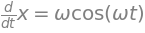

In [21]:
derivative = sp.Derivative(x, t)
func_rep = sp.diff(func_rep, t)
sp.Eq(derivative, func_rep)

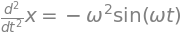

In [22]:
func_rep = sp.diff(func_rep, t)
final_exp = sp.Eq(sp.Derivative(derivative, t), func_rep)
final_exp

In [23]:
#Colocando expressões na edo

expr1 = sp.Eq(m*func_rep + k * sp.sin(omega*t), 0)
expr1

In [24]:
# Obtemos
sp.Eq(omega, sp.sqrt(k/m))

In [25]:
T, s, Kg, N = sp.symbols('T s Kg N')
sp.Eq((2*sp.pi)/T, sp.sqrt(k/m))

In [26]:
# Colocando apenas unidades de medida

sp.Eq(1/s, sp.sqrt((N/m)/Kg))

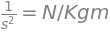

In [27]:
sp.Eq(1/s**2, (N/m)/Kg)

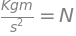

In [28]:
sp.Eq(Kg*m/s**2, N)

### Isso está correto, pois a unidade de medida do N é Kg * m / s^2

In [29]:
T, f, i = sp.symbols('T f i')

#### Verificando se cos(wt) e e^iwt são soluções da edo

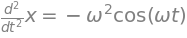

In [30]:
cos_func = sp.cos(omega*t)
#sp.diff(cos_func, t)
cos_func = sp.diff(sp.diff(cos_func, t), t)
sp.Eq(sp.Derivative(derivative, t), cos_func)

In [31]:
expr2 = sp.Eq(m*cos_func + k * sp.cos(omega*t), 0)
expr2

In [32]:
sp.Eq(k * sp.cos(omega*t), -m*cos_func)

In [33]:
# Obtemos novamente
sp.Eq(omega, sp.sqrt(k/m))

#### Possível solução geral

In [38]:
x, a, b, A, phi  = sp.symbols('x(t) a b A phi')

In [40]:
expr3 = sp.Eq(x, A*sp.cos(omega*t+phi))
expr3